In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.isna().sum()[df_train.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

<AxesSubplot:>

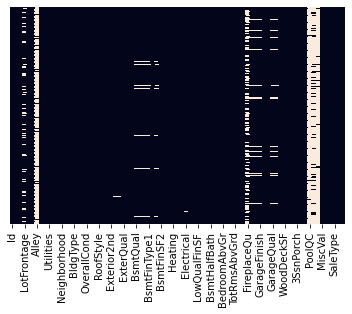

In [5]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [6]:
df_train.shape

(1460, 81)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_train['LotFrontage'].dtype

dtype('float64')

<AxesSubplot:>

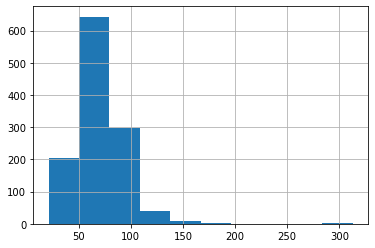

In [9]:
df_train['LotFrontage'].hist()

In [10]:
df_train['LotFrontage'].median()

69.0

In [11]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(value = df_train['LotFrontage'].median())

In [12]:
df_train.drop(['Alley'],axis=1,inplace=True)

In [13]:
df_train['BsmtQual']=df_train['BsmtQual'].fillna(value = df_train['BsmtQual'].mode()[0])
df_train['BsmtCond']=df_train['BsmtCond'].fillna(value = df_train['BsmtCond'].mode()[0])

In [14]:
df_train.drop(['GarageYrBlt'],axis=1,inplace=True)

In [15]:
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(value = df_train['FireplaceQu'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(value = df_train['GarageType'].mode()[0])

In [16]:
df_train['GarageFinish']=df_train['GarageFinish'].fillna(value = df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(value = df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(value = df_train['GarageCond'].mode()[0])

In [17]:
df_train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [18]:
df_train.shape

(1460, 76)

In [19]:
df_train.drop(['Id'],axis=1,inplace=True)

In [20]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

MasVnrType       8
MasVnrArea       8
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
dtype: int64

In [21]:
df_train['MasVnrType']=df_train['MasVnrType'].fillna(value = df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(value = df_train['MasVnrArea'].mode()[0])

<AxesSubplot:>

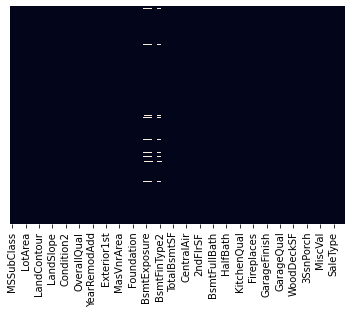

In [22]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [23]:
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(value = df_train['BsmtExposure'].mode()[0])

<AxesSubplot:>

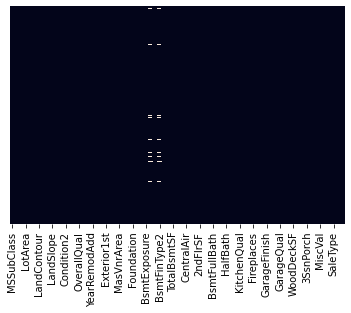

In [24]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [25]:
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(value = df_train['BsmtFinType2'].mode()[0])

In [26]:
df_train.dropna(inplace=True)

In [27]:
df_train.shape

(1422, 75)

In [28]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [29]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','MasVnrType']

In [30]:
len(columns)

39

In [31]:
def category_onehot_multcols(multcolumns):
    df_train_final=final_df_train
    i=0
    for fields in multcolumns:
        print(fields)
        df_train1=pd.get_dummies(final_df_train[fields],drop_first=True)
        final_df_train.drop([fields],axis=1,inplace=True)
        if i==0:
            df_train_final=df_train1.copy()
        else:
            df_train_final=pd.concat([df_train_final,df_train1],axis=1)
        i=i+1
    df_train_final=pd.concat([final_df_train,df_train_final],axis=1)
    return df_train_final

In [32]:
main_df_train=df_train.copy()

In [33]:
df_test=pd.read_csv('test_new.csv')

In [34]:
df_test.shape

(1459, 74)

In [35]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [36]:
final_df_train=pd.concat([df_train,df_test],axis=0)

In [37]:
final_df_train.shape

(2881, 75)

In [38]:
final_df_train=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition
MasVnrType


In [39]:
final_df_train.shape

(2881, 235)

In [40]:
final_df_train=final_df_train.loc[:,~final_df_train.columns.duplicated()]

In [41]:
final_df_train.shape

(2881, 175)

In [42]:
df_Train=final_df_train.iloc[:1422,:]
df_Test=final_df_train.iloc[1422:,:]

In [43]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\AJ\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
df_Test.shape

(1459, 174)

In [45]:
X=df_Train.drop(['SalePrice'],axis=1)
y=df_Train['SalePrice']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8685060661656305

In [49]:
import pickle
filename="final_model.pkl"
pickle.dump(RandomForestRegressor, open(filename, 'wb'))

In [50]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=60,max_depth=4,random_state=56)
model.fit(X_train,y_train)
y_predicted=model.predict(df_Test)

In [51]:
y_predicted

array([110000., 250000., 140000., ..., 140000., 135000., 140000.])

In [52]:
y_predicted.dtype

dtype('float64')

In [53]:
pred=pd.DataFrame(y_predicted)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('HPP@VRK.csv',index=False)